# Notebook for general EDA

## Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2
import os
import random
from tqdm import tqdm

(-0.5, 599.5, 599.5, -0.5)

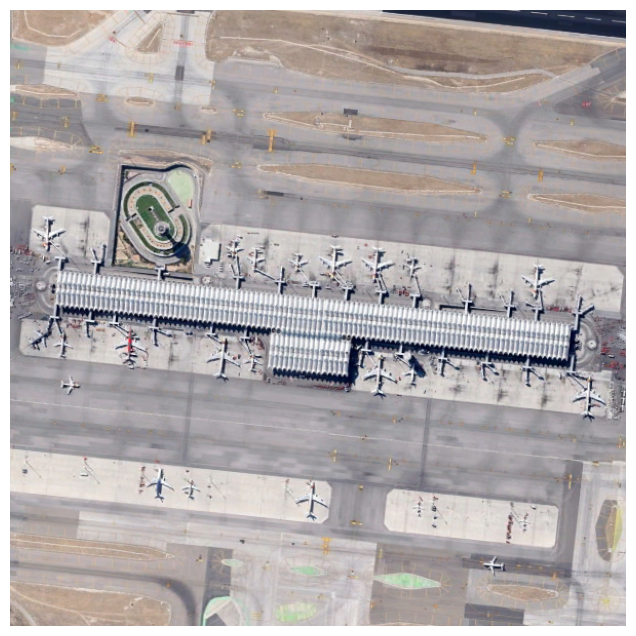

In [2]:
img = plt.imread('data/Airport/airport_1.jpg')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
ax.imshow(img)
ax.axis('off')

In [3]:
def get_random_pics_by_class(data_dir):
    dict_imgs = {}
    for cl in os.listdir(data_dir):
        f = random.choice(os.listdir(os.path.join(data_dir,cl)))
        # print(os.path.join(data_dir, cl, f))
        dict_imgs[cl] = plt.imread(os.path.join(data_dir, cl, f))

    num_classes = len(dict_imgs.keys())
    fig, axes = plt.subplots(nrows=num_classes//3, ncols=3, figsize=(8,num_classes))
    for i, cl in enumerate(dict_imgs.keys()):
        axes[i//3,i%3].imshow(dict_imgs[cl])
        axes[i//3,i%3].axis('off')
        axes[i//3,i%3].set_title(cl)

    plt.show()

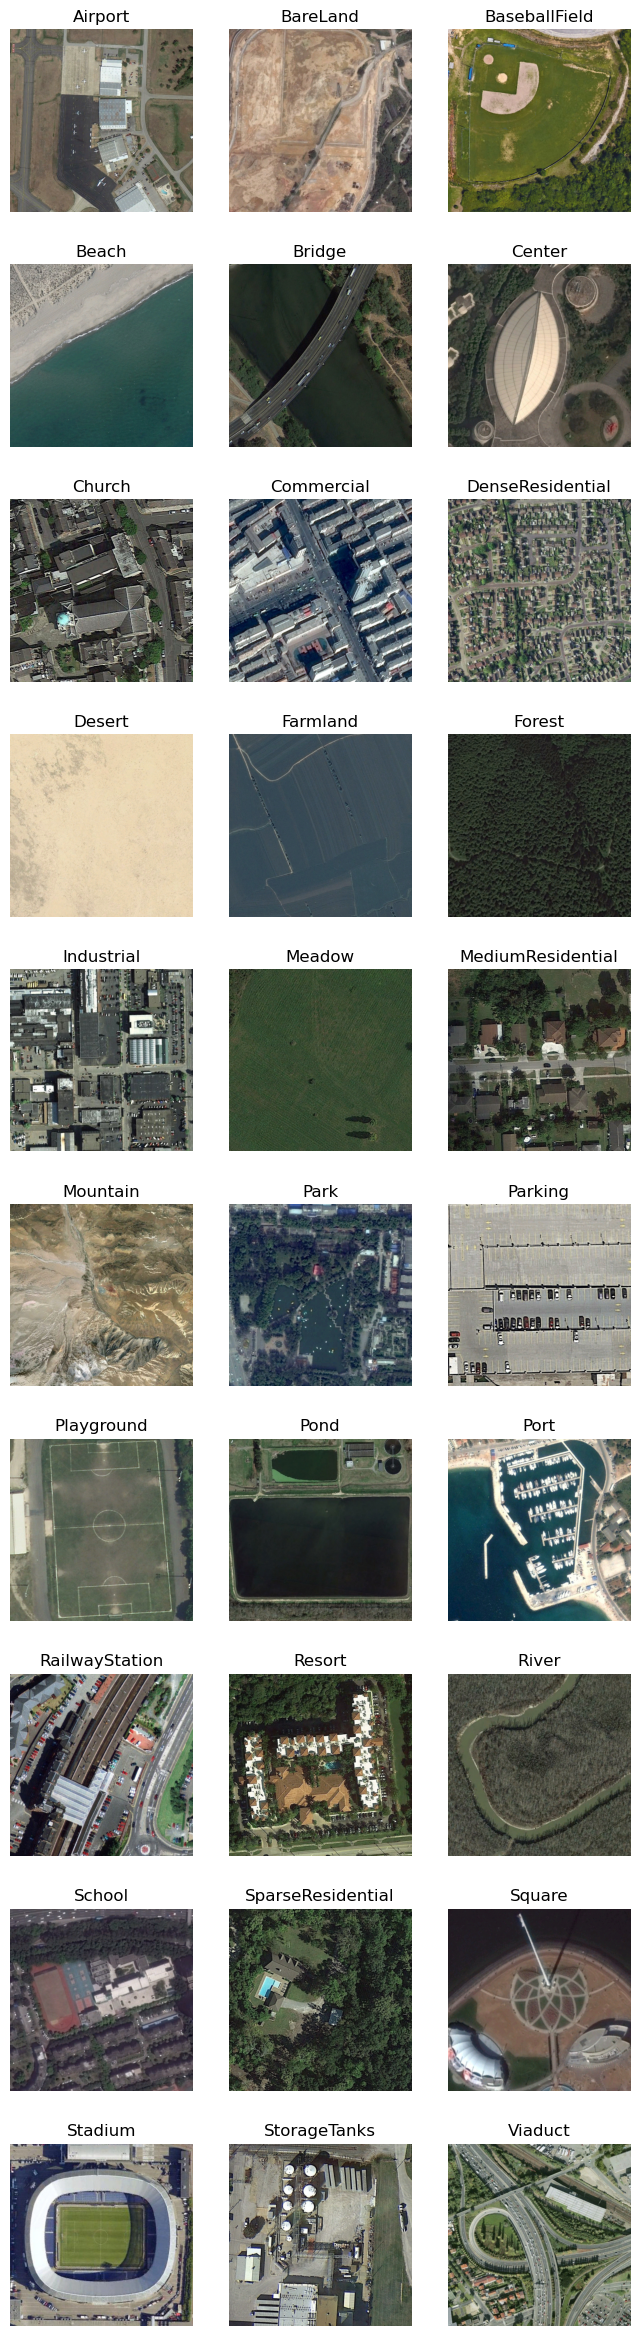

In [4]:
get_random_pics_by_class('data')

In [5]:
# dataset info
def load_dataset(data_dir):
    data = {}
    for cl in os.listdir(data_dir):
        print(cl)
        data[cl] = []
        for fname in tqdm(os.listdir(os.path.join(data_dir,cl))):
            data[cl].append(plt.imread(os.path.join(data_dir, cl, fname)))
    return data


In [6]:
data = load_dataset('data')

Airport


  0%|          | 0/360 [00:00<?, ?it/s]

100%|██████████| 360/360 [00:05<00:00, 68.86it/s]


BareLand


 46%|████▌     | 142/310 [00:02<00:02, 68.16it/s]


KeyboardInterrupt: 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'BaseballField'),
  Text(1, 0, 'Church'),
  Text(2, 0, 'Forest'),
  Text(3, 0, 'Center'),
  Text(4, 0, 'RailwayStation'),
  Text(5, 0, 'Meadow'),
  Text(6, 0, 'MediumResidential'),
  Text(7, 0, 'Resort'),
  Text(8, 0, 'Stadium'),
  Text(9, 0, 'Desert'),
  Text(10, 0, 'School'),
  Text(11, 0, 'SparseResidential'),
  Text(12, 0, 'BareLand'),
  Text(13, 0, 'Square'),
  Text(14, 0, 'Mountain'),
  Text(15, 0, 'Commercial'),
  Text(16, 0, 'Park'),
  Text(17, 0, 'Airport'),
  Text(18, 0, 'Bridge'),
  Text(19, 0, 'StorageTanks'),
  Text(20, 0, 'Farmland'),
  Text(21, 0, 'Playground'),
  Text(22, 0, 'Port'),
  Text(23, 0, 'Industrial'),
  Text(24, 0, 'Parking'),
  Text(25, 0, 'Beach'),
  Text(26, 0, 'DenseResidential'),
  Text(27, 0, 'River'),
  Text(28, 0, 'Pond'),
  Text(29, 0, 'Viaduct')])

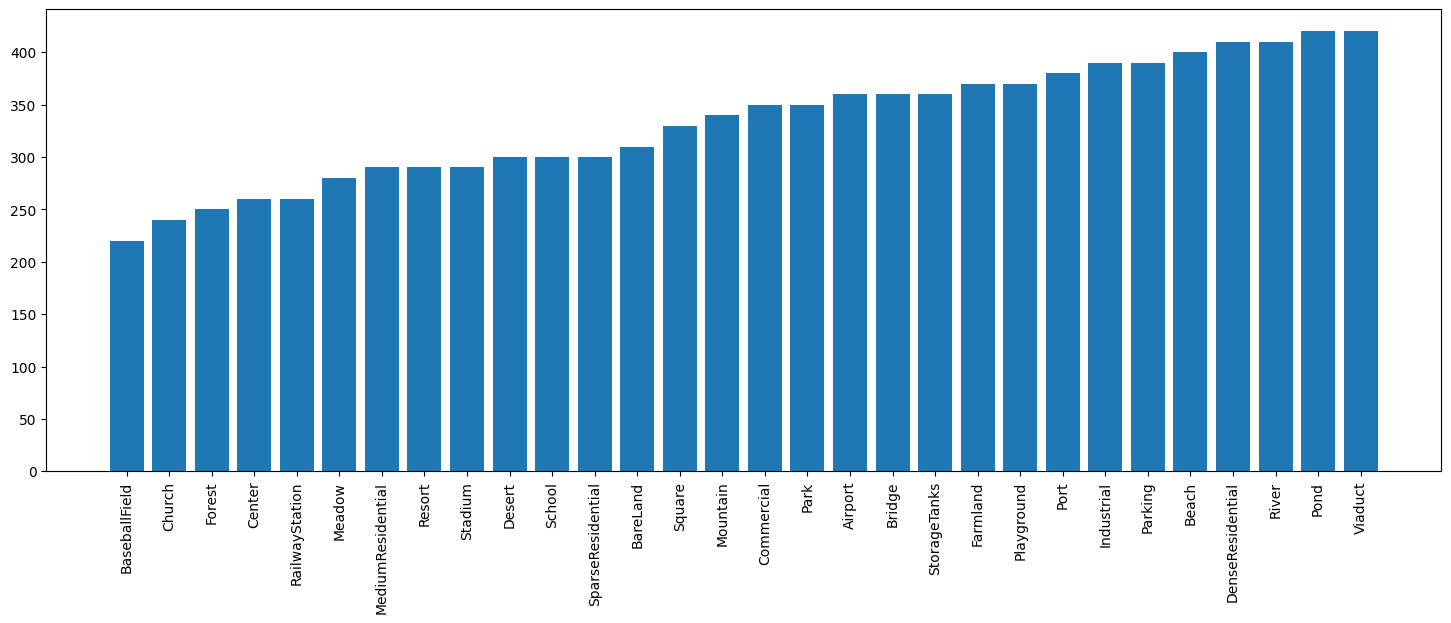

In [ ]:
tmp = {cl: len(data[cl]) for cl in data.keys()}
vals = sorted(list(tmp.values()))
labels = [x for _, x in sorted(zip(list(tmp.values()),list(tmp.keys())))]
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(range(len(tmp)), vals, tick_label=labels)
fig.savefig('plots/class_distribution.png')
plt.xticks(rotation=90)

In [ ]:
data['Airport'][0].mean(axis=(0,1)).shape

(3,)

In [ ]:
data['Airport'][0].mean(axis=(0,1))

In [ ]:
# rgb features
rgb_tmp = {cl: pd.melt(pd.DataFrame(np.array([x.mean(axis=(0,1)) for x in data[cl]]), columns=['R','G','B']), var_name='RGB', value_name='Average Value') for cl in data.keys()}

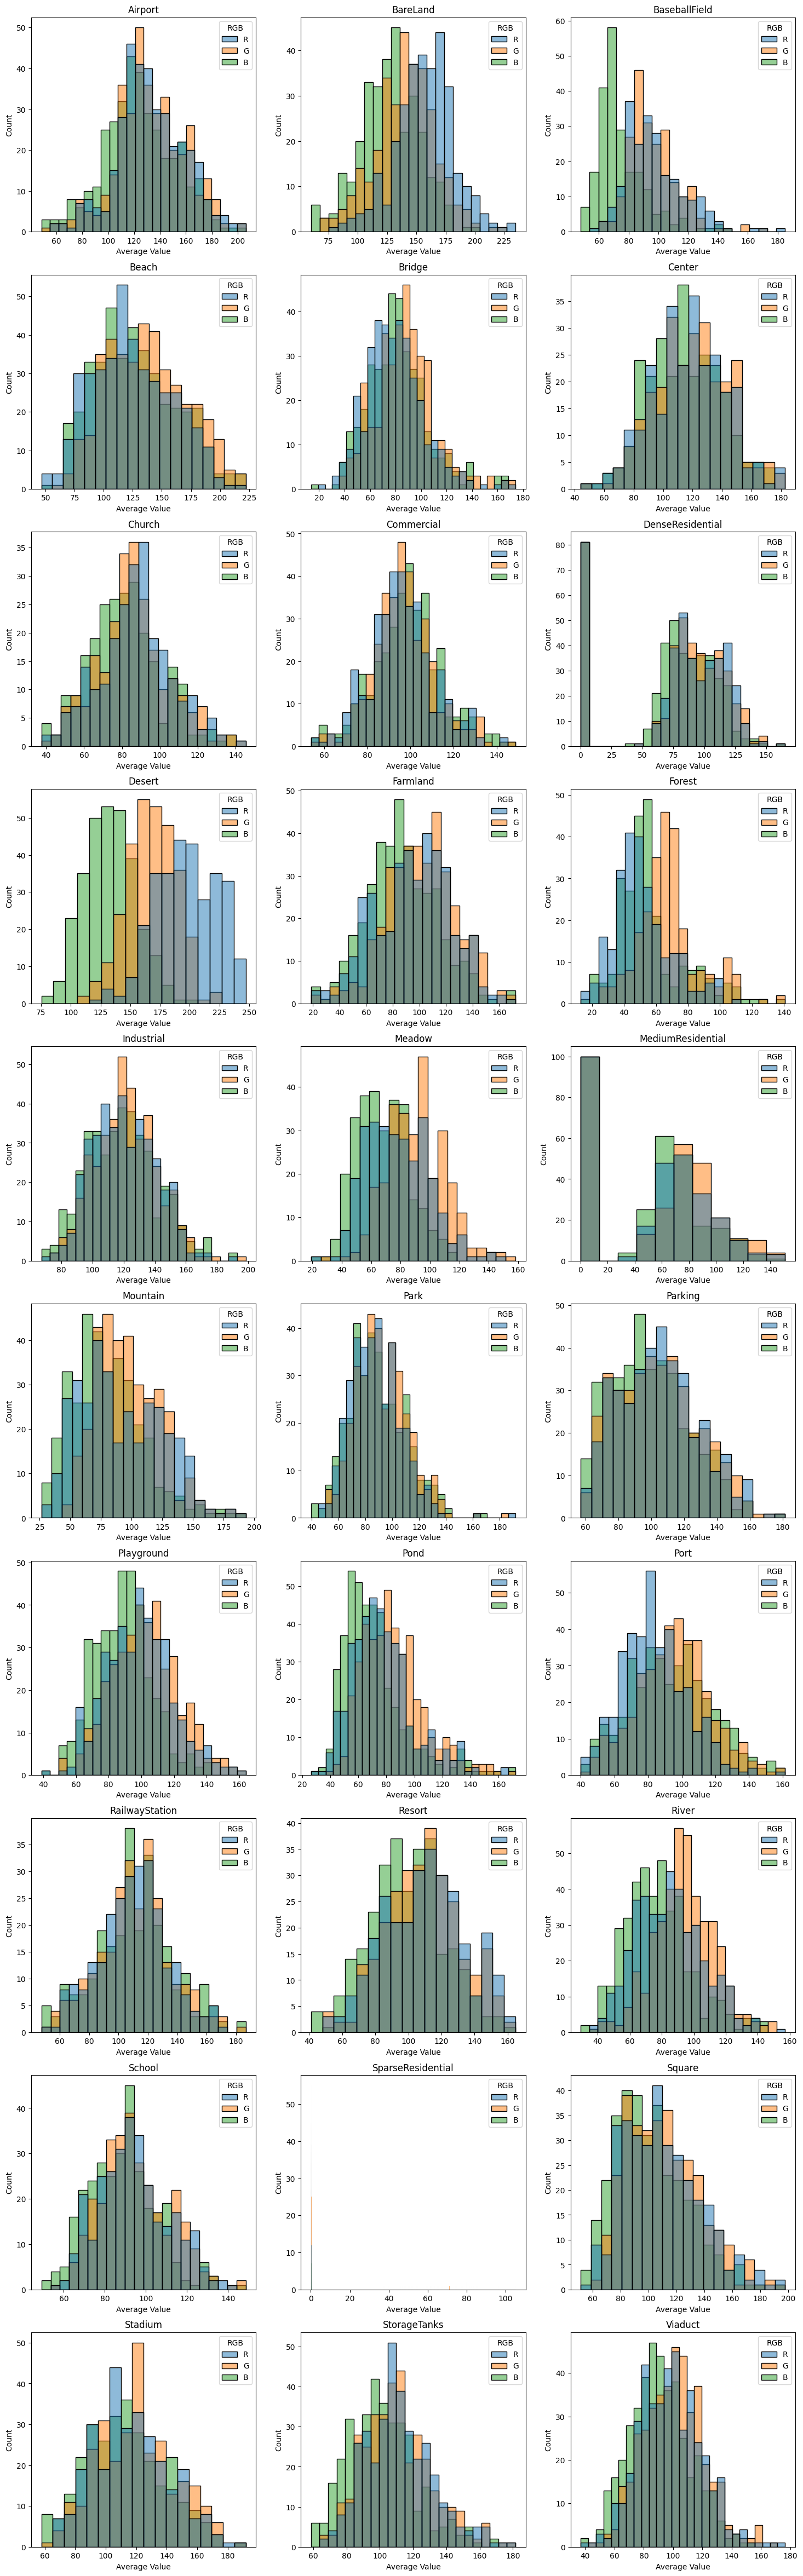

In [ ]:
num_classes = len(rgb_tmp.keys())
fig, axes = plt.subplots(nrows=num_classes//3, ncols=3, figsize=(18,num_classes*2))
for i, cl in enumerate(rgb_tmp.keys()):
    sns.histplot(x='Average Value', hue='RGB', multiple='layer', data=rgb_tmp[cl], ax=axes[i//3,i%3])
    axes[i//3,i%3].set_title(cl)
fig.savefig('plots/class_rgb_hist.png')
plt.show()

In [ ]:
rgb_tmp_3d = pd.DataFrame()
for cl in data.keys():
    tmp = pd.DataFrame(np.array([x.mean(axis=(0,1)) for x in data[cl]]), columns=['R','G','B'])
    tmp['class'] = cl
    rgb_tmp_3d = pd.concat([rgb_tmp_3d, tmp], axis=0)

rgb_tmp_3d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 419
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       10000 non-null  float64
 1   G       10000 non-null  float64
 2   B       10000 non-null  float64
 3   class   10000 non-null  object 
dtypes: float64(3), object(1)
memory usage: 390.6+ KB


In [ ]:
fig = px.scatter_3d(rgb_tmp_3d, x='R', y='G', z='B', color='class', width=800, height=800)
fig.update_traces(marker_size = 6)
fig.write_html('plots/class_scatter.html')
fig.show()